In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [ ]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train_normal.shape

(1070, 11)

In [ ]:
# model 3


tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(
    loss = tf.keras.losses.MAE,
    optimizer= tf.keras.optimizers.Adam(),
    metrics =["MAE"]
)

In [ ]:
history = model.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - MAE: 13297.0801 - loss: 13294.9736
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - MAE: 13290.2432 - loss: 13288.1328
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 13273.1611 - loss: 13271.0410 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 13235.9912 - loss: 13233.8574 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - MAE: 13167.8984 - loss: 13165.7451
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 13057.9775 - loss: 13055.8008 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - MAE: 12895.5635 - loss: 12893.3584
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 12670.4170 - loss: 12668.1797 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 12372.6035 - loss: 12370.3291 
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - MAE: 11993.9170 - loss: 11991.6006
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MAE: 11540.6494 - loss: 11538.3271 
Epoch 12/500
34/

In [ ]:
model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 3213.2292 - loss: 3220.8472 


[3197.60400390625, 3159.514404296875]

<Axes: >

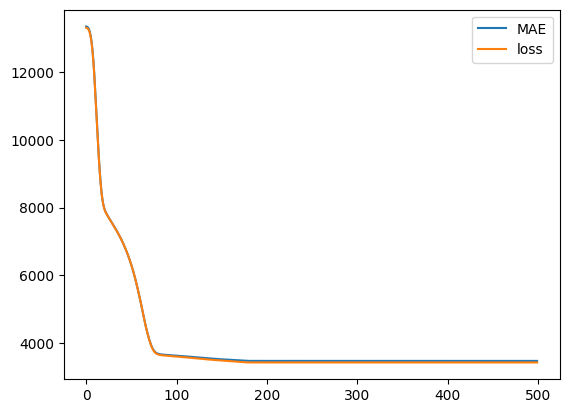

In [ ]:
pd.DataFrame(history.history).plot()